# Keeping Track of x and y (solution)
This notebook contains solution code for the previous exercise.

In [2]:
import numpy as np
from math import pi
from matplotlib import pyplot as plt

# these 2 lines just hide some warning messages.
import warnings
warnings.filterwarnings('ignore')

class Vehicle:
    def __init__(self):
        self.x       = 0.0 # meters
        self.y       = 0.0
        self.heading = 0.0 # radians
        self.history = []
        
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        delta_x = displacement * np.cos(self.heading)
        delta_y = displacement * np.sin(self.heading)
        
        new_x = self.x + delta_x
        new_y = self.y + delta_y
        
        self.history.append((self.x, self.y))

        self.x = new_x
        self.y = new_y
    
    def set_heading(self, heading_in_degrees):
        """
        Set's the current heading (in radians) to a new value
        based on heading_in_degrees. Vehicle heading is always
        between -pi and pi.
        """
        assert(-180 <= heading_in_degrees <= 180)
        rads = (heading_in_degrees * pi / 180) % (2*pi)
        self.heading = rads
        
    def turn(self, degrees):
        rads = (degrees * pi / 180)
        new_head = self.heading + rads % (2*pi)
        self.heading = new_head
    
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        # get the x and y coordinates from vehicle's history
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]
        
        # don't forget to add the CURRENT x and y
        X.append(self.x)
        Y.append(self.y)
        
        # create scatter AND plot (to connect the dots)
        plt.scatter(X,Y)
        plt.plot(X,Y)
        
        plt.title("Vehicle (x, y) Trajectory")
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.axes().set_aspect('equal', 'datalim')
        plt.show()

In [3]:
# Use this testing code to check your code for correctness.
from testing import test_drive_forward, test_set_heading

test_set_heading(Vehicle)
test_drive_forward(Vehicle)

Your set_heading function looks good!
Congratulations! Your vehicle's drive_forward method works


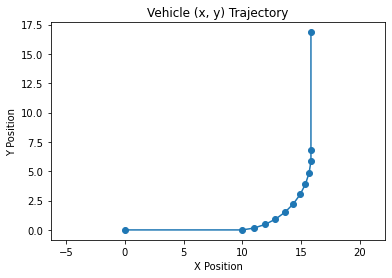

In [4]:
# instantiate vehicle
v = Vehicle()

# drive forward 10 meters
v.drive_forward(10)

# turn left in 10 increments of 9 degrees each.
for _ in range(10):
    v.turn(9.0)
    v.drive_forward(1)

v.drive_forward(10)

v.show_trajectory()